In [5]:
import urllib
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from sklearn import datasets



## sklearn -- metrics
from sklearn.metrics import silhouette_score

## sklearn -- Models
from sklearn.cluster import KMeans, DBSCAN

In [8]:
url = 'https://img.freepik.com/free-photo/purple-osteospermum-daisy-flower_1373-16.jpg'


urllib.request.urlretrieve(url, 'sample.jpg')
img = Image.open('sample.jpg')
img_array = np.array(img)
img_array.shape

(431, 626, 3)

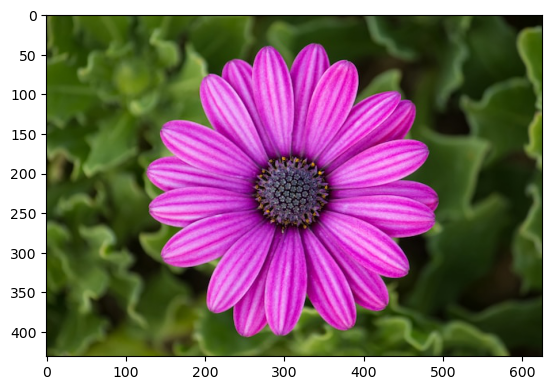

In [10]:
plt.imshow(img_array)

In [11]:
img_array[:, :, 0]

array([[54, 71, 89, ...,  9, 11, 11],
       [58, 74, 92, ...,  9, 11, 11],
       [63, 80, 98, ..., 10, 11, 11],
       ...,
       [48, 51, 55, ..., 20, 18, 18],
       [45, 48, 52, ..., 20, 17, 17],
       [43, 46, 49, ..., 19, 17, 17]], dtype=uint8)

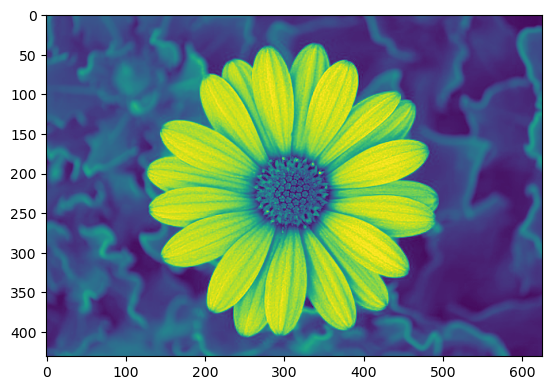

In [12]:
plt.imshow(img_array[:, :, 0])

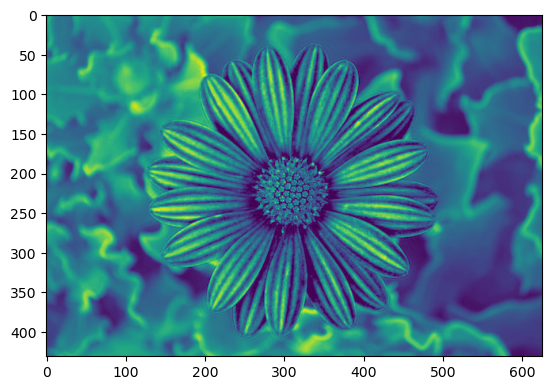

In [13]:
plt.imshow(img_array[:, :, 1])

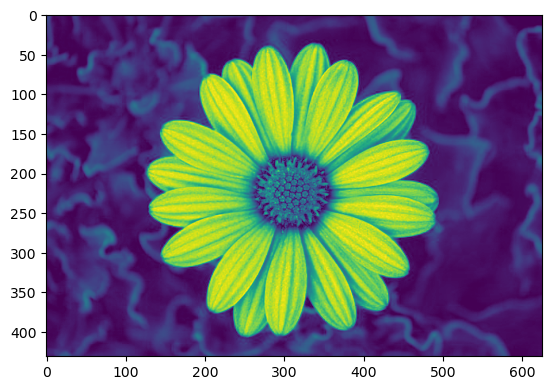

In [14]:
plt.imshow(img_array[:, :, 2])

In [17]:
img_reshp = img_array.reshape(-1, 3)
img_reshp.shape

(269806, 3)

In [21]:
kmeans = KMeans(n_clusters=5, n_init=10)
kmeans.fit(img_reshp)

KMeans(n_clusters=5, n_init=10)

In [28]:
labels = kmeans.labels_
labels

array([2, 2, 4, ..., 0, 0, 0])

In [33]:
centroids = kmeans.cluster_centers_
centroids

array([[ 30.74093227,  41.08187591,  11.20098882],
       [231.15395419, 105.23999835, 226.54059525],
       [ 60.87623617,  82.64503532,  24.91676663],
       [191.50368844,  38.44598168, 179.64824764],
       [ 99.70925616, 119.25725986,  58.53374616]])

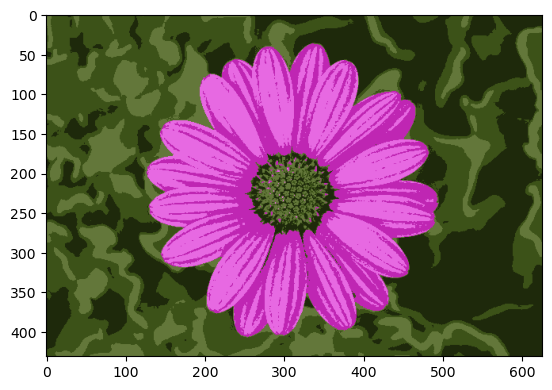

In [32]:
img_new = centroids[labels].reshape(img_array.shape)
plt.imshow(img_new.astype('uint8'))

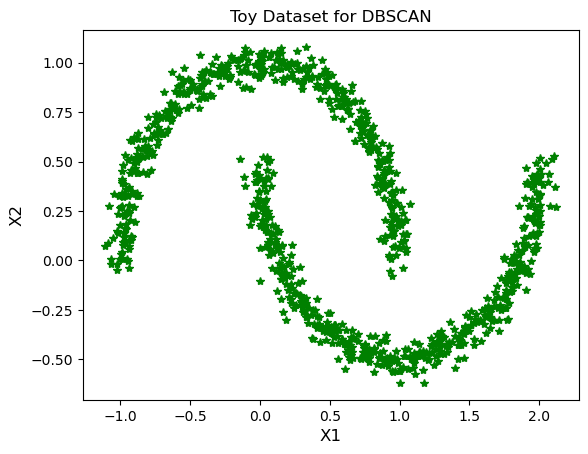

In [6]:
## Try DBSCAN
## Create dataset
X, y = datasets.make_moons(n_samples=1000, noise=0.05, random_state=42)  ## we dont't need y, only x (two features)

plt.plot(X[:,0], X[:,1], 'g*')
plt.title('Toy Dataset for DBSCAN', fontsize=12)
plt.xlabel('X1', fontsize=12)
plt.ylabel('X2', fontsize=12)
plt.show()

In [7]:
from sklearn.cluster import DBSCAN

In [16]:
dbscan_1 = DBSCAN(eps=0.09, min_samples=5)
y1 = dbscan_1.fit_predict(X)

In [17]:
np.unique(dbscan_1.labels_)

array([-1,  0,  1], dtype=int64)

In [18]:
X.shape

(1000, 2)

In [24]:
dbscan_1.components_    ##core points

array([[-0.02137124,  0.40618608],
       [ 0.97670045, -0.45832306],
       [ 0.90405882, -0.37651952],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

In [27]:
df_outs = pd.DataFrame(np.c_[X,dbscan_1.labels_], columns=['f1']+['f2']+['Clusters'])